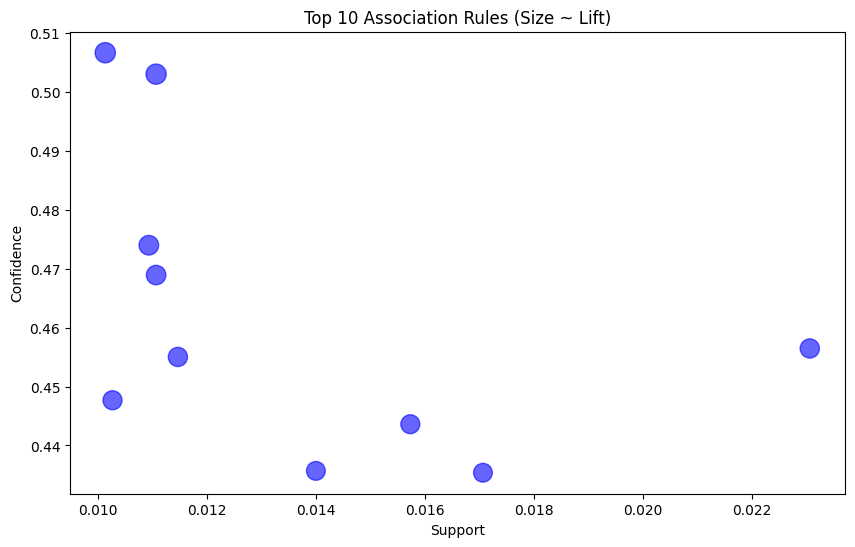

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
133,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
149,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725
121,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,1.0,0.005434,1.447937,0.508837,0.043640,0.309362,0.259925
143,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,1.0,0.005440,1.434136,0.503555,0.044102,0.302716,0.257674
100,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
160,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562
158,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,1.0,0.004799,1.378954,0.478514,0.040892,0.274813,0.245370
155,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,1.0,0.007278,1.368879,0.479672,0.060950,0.269475,0.254802
124,"(milk, chocolate)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,1.0,0.006340,1.349656,0.467922,0.054574,0.259071,0.247205
152,"(ground beef, spaghetti)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,1.0,0.007722,1.348914,0.470957,0.065507,0.258663,0.253481


In [15]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

# Step 2: Load the dataset without headers
# The dataset contains transaction data without headers, so we load it with header=None
data = pd.read_csv("Order2.csv", header=None)

# Step 3: Data Pre-processing
# Each transaction (row) contains items as columns, so we need to convert it into a list of transactions
transactions = []
for i in range(len(data)):
    # Extract non-NaN values in each row and store them as a list (each list is a transaction)
    transaction = [str(data.values[i, j]) for j in range(len(data.columns)) if pd.notna(data.values[i, j])]
    transactions.append(transaction)

# Step 4: Convert the list of transactions into a one-hot encoded format
# Use TransactionEncoder to perform the one-hot encoding transformation
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Step 5: Apply the Apriori algorithm
# Set a minimum support threshold for frequent itemsets (e.g., 1% support in this case)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Step 6: Generate association rules
# Generate association rules from the frequent itemsets based on a minimum confidence of 0.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2,num_itemsets=5)

# Step 7: Visualize the List of Rules
# Sort the rules by confidence in descending order to get the top rules
top_rules = rules.sort_values(by="confidence", ascending=False).head(10)

# Plotting the top 10 rules
# The size of each point in the scatter plot represents the lift of the rule
plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], s=top_rules['lift']*100, c='blue', alpha=0.6)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Top 10 Association Rules (Size ~ Lift)')
plt.show()

# Display the top rules
top_rules
